# **ЗАДАНИЕ**

## **Визуальный анализ данных**

<br>

**Условие 1: Задача 1**

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

<br>


1.1. Скачать следующие данные: kc-house-data

1.2. Изучите стоимости недвижимости

1.3. Изучите распределение квадратуры жилой площади

1.4. Изучите распределение года постройки



<br>


**Условие 2: 2 задача**

2.1. Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

2.2. Изучите распределение этажей домов

2.3. Изучите распределение состояния домов



<br>

**Условие 3: 3 задача**

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.


<br>

---

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.



---





---



# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

import seaborn as sns

!pip install mplcyberpunk
import mplcyberpunk

import plotly
import plotly.graph_objs as go
import plotly.express as px

import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [ ]:
# Зададим отображение данных по всем столбцам:
pd.set_option('display.max_columns', None)


# Зададим настройки отображения дробных чисел (три знака после запятой),
# что также позволит избежать применения экспоненциального формата:
pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
# Подключение к Google-Диску:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загружаем данные файла kc_house_data.csv, сохраняя при этом данные
# в датафрейм df_houses.
# При этом предварительно прописан путь к файлу на Google-Диске,
# с учетом всех вложенных папок:

df_houses = pd.read_csv('/content/drive/MyDrive/GB/\
КУРС ОСНОВЫ ЯЗЫКА PYTHON ДЛЯ АНАЛИТИКИ/Tasks/Task_4_Attestation/\
kc-house-data.csv')



---



**ОПИСАНИЕ ПРИЗНАКОВ В ДАТАСЕТЕ:**

<br>


- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Количество спален
- bathrooms - Количество ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Количество этажей
- waterfront - Есть набережная или нет
- view - Значение от 0 до 4, насколько хороший вид
- condition - Значение от 1 до 5, насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широта
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей



---



In [ ]:
# Вывод первых пяти строк датафрейма:

df_houses.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.000         3      1.000         1180   
1  6414100192  20141209T000000 538000.000         3      2.250         2570   
2  5631500400  20150225T000000 180000.000         2      1.000          770   
3  2487200875  20141209T000000 604000.000         4      3.000         1960   
4  1954400510  20150218T000000 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650   1.000           0     0          3      7        1180   
1      7242   2.000           0     0          3      7        2170   
2     10000   1.000           0     0          3      6         770   
3      5000   1.000           0     0          5      7        1050   
4      8080   1.000           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0              0      1955             0    98178 47.511 -122.257   
1            400      1951          1991    98125 47.721 -122.319   
2              0      1933             0    98028 47.738 -122.233   
3            910      1965             0    98136 47.521 -122.393   
4              0      1987             0    98074 47.617 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [ ]:
# Вывод случайных пяти строк датафрейма:

df_houses.sample(5)

id             date      price  bedrooms  bathrooms  \
9444   3834000720  20150319T000000 390000.000         2      1.000   
18667  3226049054  20141003T000000 526500.000         3      1.500   
20965  3679400484  20140918T000000 295500.000         3      2.500   
8063   1311910300  20150204T000000 260000.000         5      2.250   
17824  2645500021  20141009T000000 339275.000         3      1.500   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
9444          1140      8147   1.000           0     0          3      7   
18667         1310      7236   1.000           0     0          4      7   
20965         1410      1332   2.000           0     0          3      7   
8063          2320      6375   1.000           0     0          4      7   
17824         1590      7260   1.000           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode    lat  \
9444         1140              0      1958             0    98125 47.728   
18667        1170            140      1928             0    98103 47.694   
20965         960            450      2014             0    98108 47.568   
8063         1270           1050      1967             0    98001 47.335   
17824        1080            510      1964             0    98133 47.775   

          long  sqft_living15  sqft_lot15  
9444  -122.289           1260        8148  
18667 -122.333           1680        8431  
20965 -122.314           1410        1343  
8063  -122.282           1760        7600  
17824 -122.353           1590        7594



---



## Ознакомление с данными

In [ ]:
# Первичное ознакомление с данными из датафрейма:

df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Основные статистические характеристики

In [ ]:
# Основные статистические показатели по числовым переменным:

df_houses.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21613.000   21613.000 21613.000  21613.000    21613.000   
mean  4580301520.865  540088.142     3.371      2.115     2079.900   
std   2876565571.312  367127.196     0.930      0.770      918.441   
min      1000102.000   75000.000     0.000      0.000      290.000   
25%   2123049194.000  321950.000     3.000      1.750     1427.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900445.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21613.000 21613.000   21613.000 21613.000  21613.000 21613.000   
mean    15106.968     1.494       0.008     0.234      3.409     7.657   
std     41420.512     0.540       0.087     0.766      0.651     1.175   
min       520.000     1.000       0.000     0.000      1.000     1.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10688.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
count   21613.000      21613.000 21613.000     21613.000 21613.000 21613.000   
mean     1788.391        291.509  1971.005        84.402 98077.940    47.560   
std       828.091        442.575    29.373       401.679    53.505     0.139   
min       290.000          0.000  1900.000         0.000 98001.000    47.156   
25%      1190.000          0.000  1951.000         0.000 98033.000    47.471   
50%      1560.000          0.000  1975.000         0.000 98065.000    47.572   
75%      2210.000        560.000  1997.000         0.000 98118.000    47.678   
max      9410.000       4820.000  2015.000      2015.000 98199.000    47.778   

           long  sqft_living15  sqft_lot15  
count 21613.000      21613.000   21613.000  
mean   -122.214       1986.552   12768.456  
std       0.141        685.391   27304.180  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.230       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000



---



In [ ]:
# Целесообразно изменить типы данных для некоторых переменных:

df_houses['id'] = df_houses['id'].astype(str)

df_houses['date'] = pd.to_datetime(df_houses['date'], format="%Y%m%dT%H%M%S")

df_houses['zipcode'] = df_houses['zipcode'].astype(str)

In [ ]:
#  Также хотим проверить, что в ряде столбце DataFrame после десятичной точки
#  содержатся только нули.
#  Если это так, то можно безопасно преобразовать тип данных этого столбца
#  из вещественного (float) в целый (int), что может сэкономить память
#  и упростить некоторые операции:


# Список столбцов для проверки:
columns_to_check = df_houses[['price', 'floors']]

for column in columns_to_check:
    # Преобразуем столбец в int и обратно в float
    temp = df_houses[column].astype(int).astype(float)

    # Сравниваем полученный результат с исходным столбцом
    if (temp == df_houses[column]).all():
        df_houses[column] = df_houses[column].astype(int)
        print(f"Тип данных столбца {column} изменен на целый.")
    else:
        print(f"В столбце {column} есть числа с дробной частью.")

Тип данных столбца price изменен на целый.
В столбце floors есть числа с дробной частью.


In [ ]:
# Проверка результатов преобразования типов данных:

df_houses.dtypes

id                       object
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [ ]:
# Проверка результатов преобразования типов данных:

df_houses.sample(5)

id       date    price  bedrooms  bathrooms  sqft_living  \
2565   7856400240 2015-02-11  1650000         4      3.000         3900   
4432   3815500165 2014-09-11   396000         5      2.750         2840   
19726  6666830320 2015-03-24   950968         5      3.500         3220   
12867  1138010180 2015-05-11   399950         3      2.500         1510   
15044  2436200715 2014-05-06   484000         2      1.750         1660   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2565       9750   1.000           0     4          5     10        2520   
4432      12253   1.000           0     0          3      7        1420   
19726      5081   2.000           0     0          3      8        3220   
12867      7300   1.000           0     0          3      7        1040   
15044      6000   1.000           0     0          3      7        1160   

       sqft_basement  yr_built  yr_renovated zipcode    lat     long  \
2565            1380      1972             0   98006 47.560 -122.158   
4432            1420      1960             0   98028 47.762 -122.253   
19726              0      2013             0   98052 47.705 -122.111   
12867            470      1974             0   98034 47.715 -122.211   
15044            500      1942             0   98105 47.662 -122.291   

       sqft_living15  sqft_lot15  
2565            3410        9450  
4432            2210       11620  
19726           2970        5753  
12867           1360        7300  
15044           1660        4000

In [ ]:
# После преобразования типов данных для переменных id, date, zipcode, price -
# Основные статистические показатели по числовым переменным:

df_houses.describe()

date       price  bedrooms  bathrooms  \
count                          21613   21613.000 21613.000  21613.000   
mean   2014-10-29 04:38:01.959931648  540088.142     3.371      2.115   
min              2014-05-02 00:00:00   75000.000     0.000      0.000   
25%              2014-07-22 00:00:00  321950.000     3.000      1.750   
50%              2014-10-16 00:00:00  450000.000     3.000      2.250   
75%              2015-02-17 00:00:00  645000.000     4.000      2.500   
max              2015-05-27 00:00:00 7700000.000    33.000      8.000   
std                              NaN  367127.196     0.930      0.770   

       sqft_living    sqft_lot    floors  waterfront      view  condition  \
count    21613.000   21613.000 21613.000   21613.000 21613.000  21613.000   
mean      2079.900   15106.968     1.494       0.008     0.234      3.409   
min        290.000     520.000     1.000       0.000     0.000      1.000   
25%       1427.000    5040.000     1.000       0.000     0.000      3.000   
50%       1910.000    7618.000     1.500       0.000     0.000      3.000   
75%       2550.000   10688.000     2.000       0.000     0.000      4.000   
max      13540.000 1651359.000     3.500       1.000     4.000      5.000   
std        918.441   41420.512     0.540       0.087     0.766      0.651   

          grade  sqft_above  sqft_basement  yr_built  yr_renovated       lat  \
count 21613.000   21613.000      21613.000 21613.000     21613.000 21613.000   
mean      7.657    1788.391        291.509  1971.005        84.402    47.560   
min       1.000     290.000          0.000  1900.000         0.000    47.156   
25%       7.000    1190.000          0.000  1951.000         0.000    47.471   
50%       7.000    1560.000          0.000  1975.000         0.000    47.572   
75%       8.000    2210.000        560.000  1997.000         0.000    47.678   
max      13.000    9410.000       4820.000  2015.000      2015.000    47.778   
std       1.175     828.091        442.575    29.373       401.679     0.139   

           long  sqft_living15  sqft_lot15  
count 21613.000      21613.000   21613.000  
mean   -122.214       1986.552   12768.456  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.230       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000  
std       0.141        685.391   27304.180

In [ ]:
# Выберем числовые переменные:

num_vars = list(df_houses.select_dtypes(include=[float, int]).columns)

In [ ]:
# Отдельно произведем расчет моды по количественным переменным:

df_houses[num_vars].mode()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 350000.000     3.000      2.500     1300.000  5000.000   1.000       0.000   
1 450000.000       NaN        NaN          NaN       NaN     NaN         NaN   
2        NaN       NaN        NaN          NaN       NaN     NaN         NaN   
3        NaN       NaN        NaN          NaN       NaN     NaN         NaN   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0 0.000      3.000  7.000    1300.000          0.000  2014.000         0.000   
1   NaN        NaN    NaN         NaN            NaN       NaN           NaN   
2   NaN        NaN    NaN         NaN            NaN       NaN           NaN   
3   NaN        NaN    NaN         NaN            NaN       NaN           NaN   

     lat     long  sqft_living15  sqft_lot15  
0 47.532 -122.290       1540.000    5000.000  
1 47.549      NaN            NaN         NaN  
2 47.662      NaN            NaN         NaN  
3 47.685      NaN            NaN         NaN

In [ ]:
# После преобразования типов данных для переменных id, date, zipcode, price -
# Основные статистические показатели по категориальным переменным:

df_houses.describe(include='object')

id zipcode
count       21613   21613
unique      21436      70
top     795000620   98103
freq            3     602

Как видим, данные по некоторым домам могут встречаться более одного раза.

Дома расположены географически в одном регионе, что объясняет повторяемость индексов.

In [ ]:
df_houses['id'].value_counts()

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

In [ ]:
df_houses['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64



---



**Визуализация распределений по признакам**

Числовые признаки

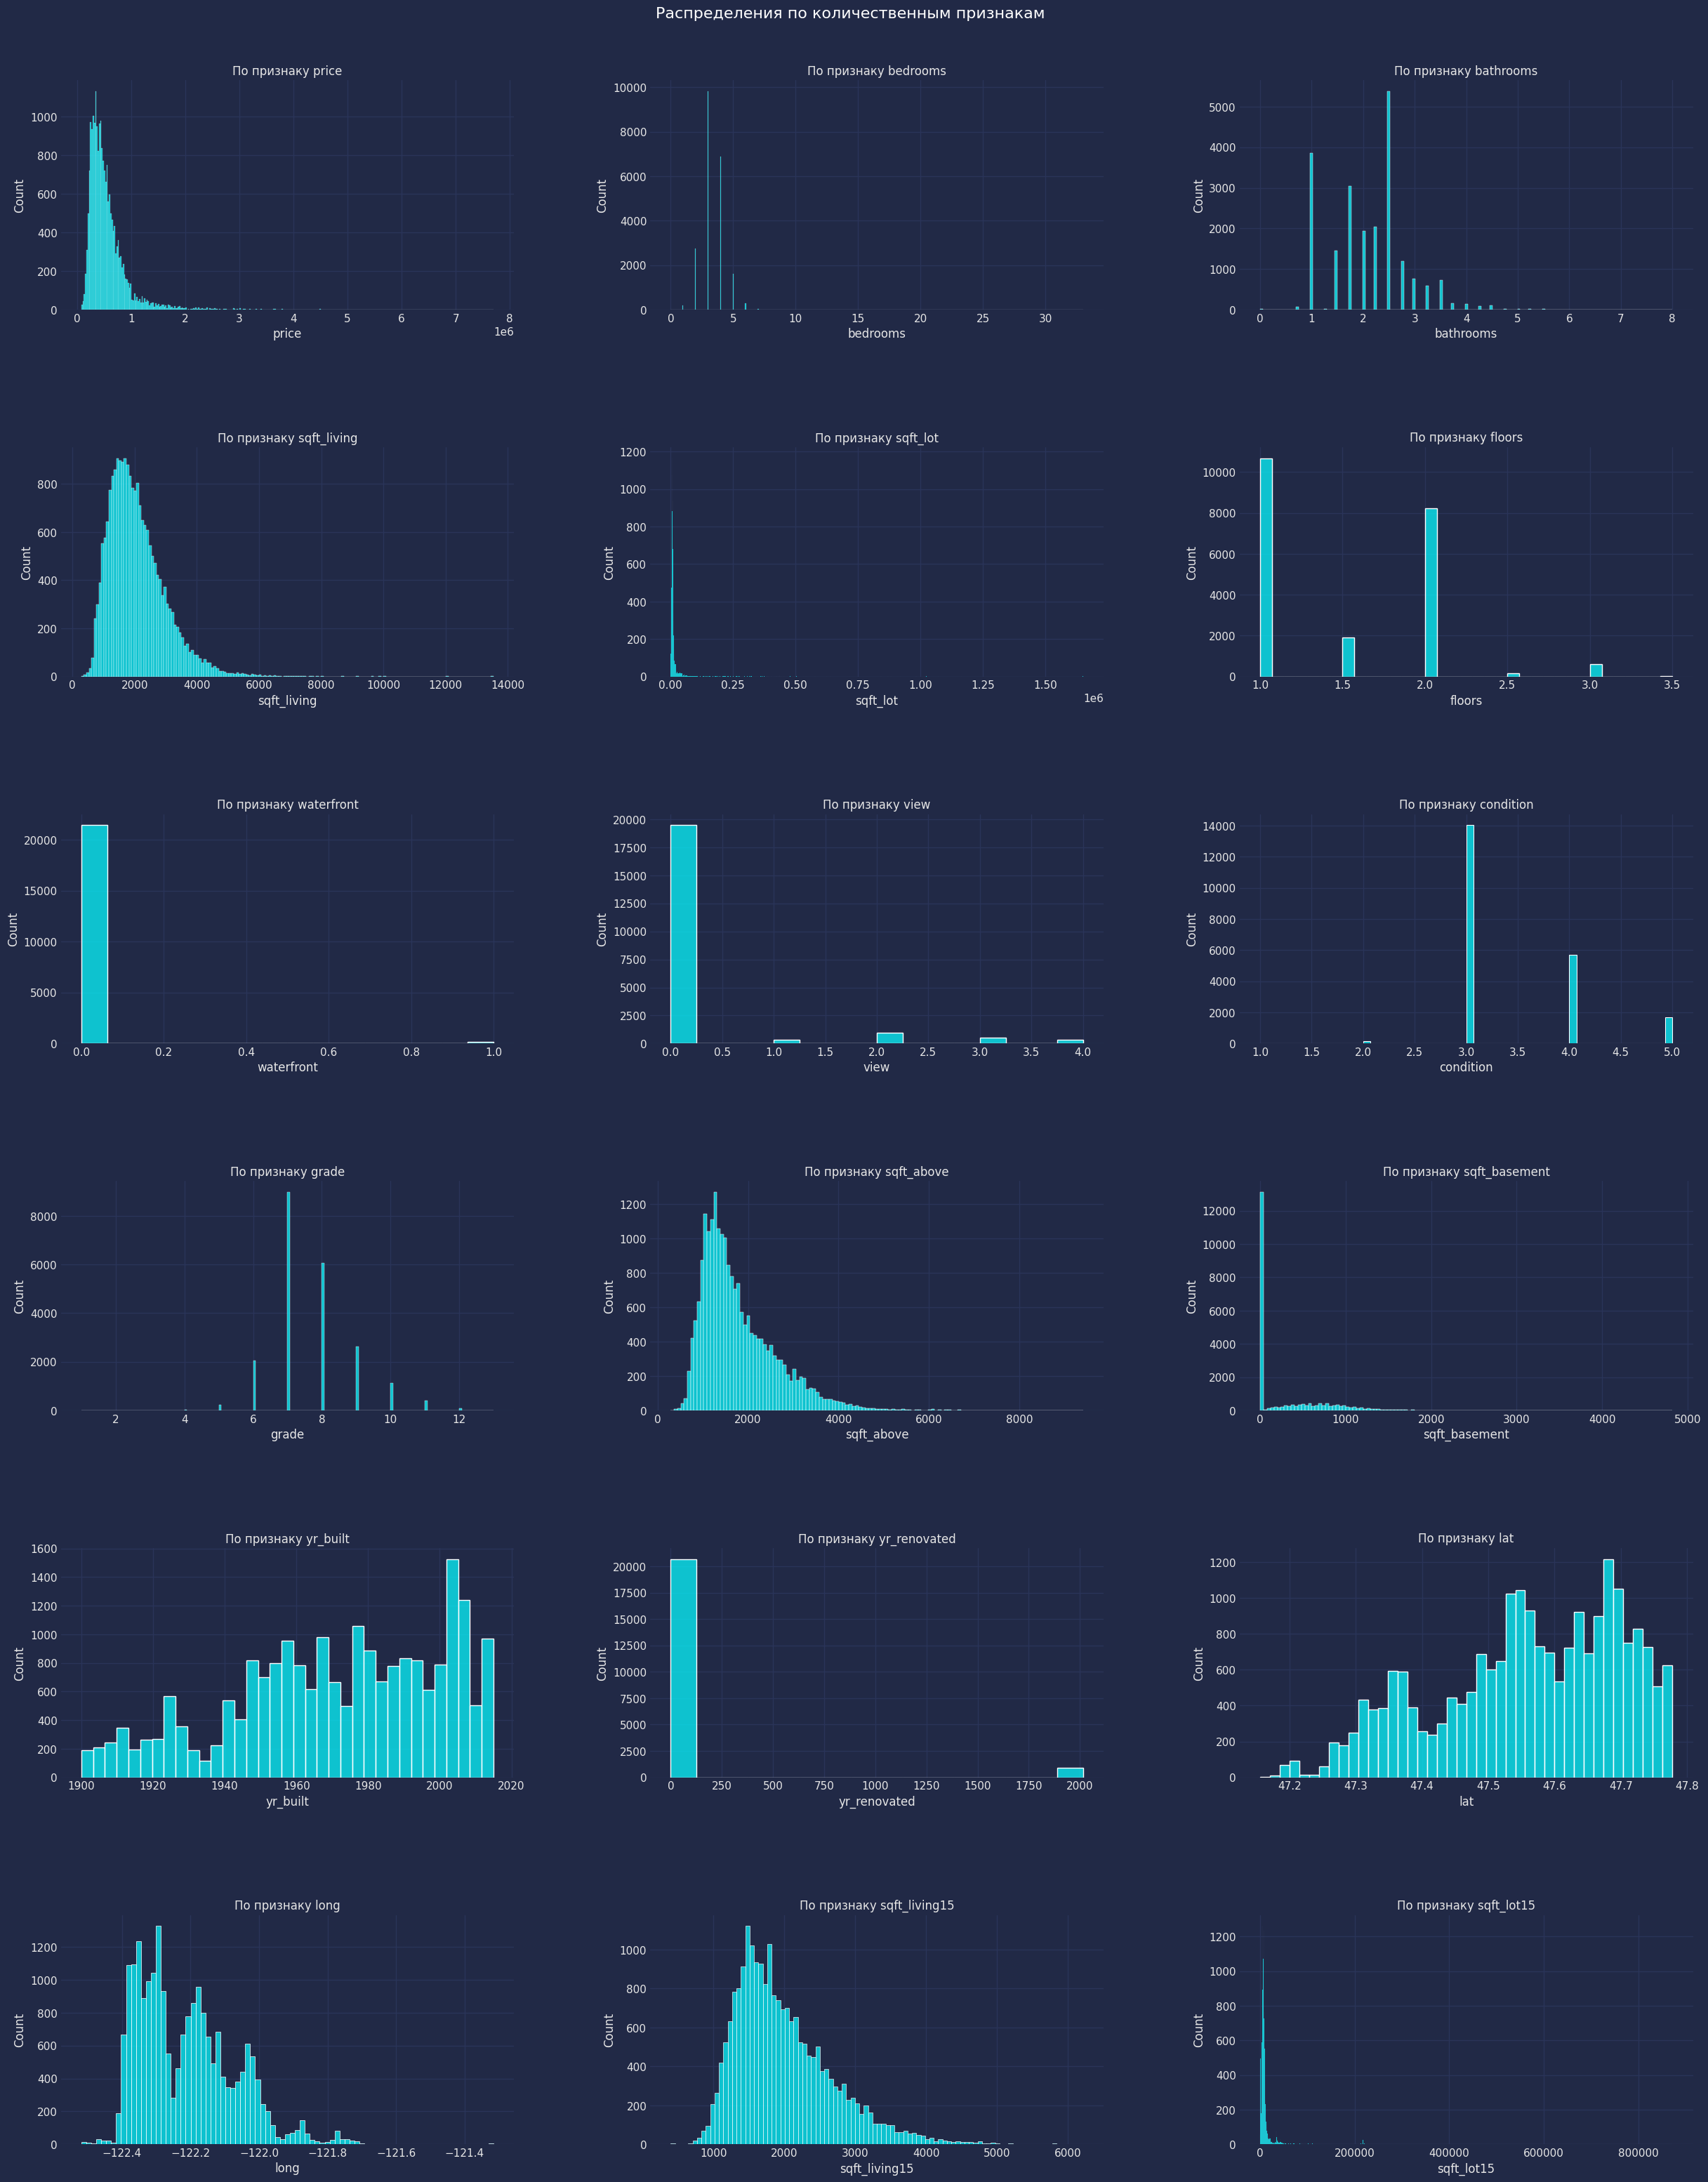

In [228]:
plt.style.use('cyberpunk')

# Динамическое определение количества строк и столбцов:
rows = (len(num_vars) - 1) // 3 + 1
columns = min(len(num_vars), 3)

# Создание сетки поддиаграмм:
gs = gridspec.GridSpec(rows, columns, wspace=0.3, hspace=0.6)

# Создание фигуры:
fig = plt.figure(figsize=(30, 35))

# Создание списка осей:
axes = []
for i in range(rows * columns):
    ax = fig.add_subplot(gs[i])
    axes.append(ax)

# Итерирование по числовым переменным:
for i, (var, ax) in enumerate(zip(num_vars, axes[:len(num_vars)])):
    # Установка размера шрифта:
    sns.set(font_scale=1)

    # Создание histplot для текущей переменной:
    sns.histplot(data=df_houses, x=var, ax=ax)

    # Подпись оси:
    ax.set_title(f'По признаку {var}')

# Сделать пустые поддиаграммы невидимыми:
for ax in axes[len(num_vars):]:
        ax.axis('off')

fig.suptitle('Распределения по количественным признакам',
             fontsize=16,
             color='white')

# Регулировка расстояния между поддиаграммами и краями фигуры:
plt.subplots_adjust(top=0.95)  # верхний отступ

plt.show()



---





---



**ВЫВОДЫ:**

Данный датасет содержит **информацию о 21 613 домах, проданных в определенный период времени.** В нем представлены **21 характеристика каждого дома**, включая ID, дату продажи, цену, характеристики жилой площади, количество этажей, наличие набережной, вид, состояние, качество постройки, площадь дома и его подвала, год постройки и ремонта, почтовый индекс, географические координаты, а также площадь и общую площадь 15 соседних домов.

<br>


**Размер датасета:**

21 613 записей (строк) и 21 столбец (переменные, признаки).

<br>


**Типы данных (изначальные):**

1 столбец содержит категориальные данные ("date"),

5 столбцов - числа с плавающей запятой,

15 столбцов - целые числа.

<br>


Далее было выполнено преобразование типов данных для переменных id (на строковый), date (на тип даты и времени), zipcode (на строковый), price (на целочисленный).

<br>

**Пропуски данных:**

Отсутствуют, что является благоприятным фактором.


<br>

**Первичные гипотезы относительно признаков в датасете:**



* Цена: Стоимость домов может иметь широкий диапазон, что
позволяет исследовать факторы, влияющие на цену.

* Количество спален и ванных комнат: Эти переменные могут быть связаны с размером и стоимостью дома.

* Площадь: Переменные sqft_living, sqft_lot, sqft_above и sqft_basement дают представление о размерах дома и его жилой площади.

* Состояние, качество и год постройки: Эти переменные могут влиять на стоимость дома.

* Наличие набережной и вид: Эти характеристики могут влиять на привлекательность и стоимость дома.

* Географическое положение: Переменные zipcode, lat и long позволяют проанализировать влияние местоположения на цену.

* Характеристики соседей: sqft_living15 и sqft_lot15 могут быть признаками эффекта соседства, влияющего на стоимость.



---



**ОСНОВНЫЕ ВЫВОДЫ НА ОСНОВАНИИ СТАТИСТИЧЕСКИХ ПОКАЗАТЕЛЕЙ ПО ПЕРЕМЕННЫМ:**


<br>


**Данный датасет содержит информацию о 21 613 домах, проданных в период со 2 мая 2014 года по 27 мая 2015 года.**

<br>


Числовые переменные:

<br>


Цена:

Средняя цена дома составляет 540 088 долларов США.
Цены на дома варьируются от 75 000 до 7 700 000 долларов США.
25% домов были проданы за 321 950 долларов США или меньше, а 75% - за 645 000 долларов США или меньше.

<br>



Количество спален:

В среднем в доме 3,4 спальни.
Количество спален в домах колеблется от 0 до 33.

<br>


Количество ванных комнат:

В среднем в доме 2,1 ванных комнаты.
Количество ванных комнат в домах колеблется от 0 до 8.

<br>

Жилая площадь:

Средняя жилая площадь дома составляет 2 079,9 квадратных метров.
Жилая площадь домов колеблется от 290 до 13 540 квадратных метров.
25% домов имеют жилую площадь 1 427 квадратных метров или меньше, а 75% - 2 550 квадратных метров или меньше.

<br>

Общая площадь:

Средняя общая площадь составляет 15 106,968 квадратных метров.
Общая площадь варьируется от 520 до 1 651 359 квадратных метров.
25% участков имеют площадь 5 040 квадратных метров или меньше, а 75% - 10 688 квадратных метров или меньше.

<br>

Этажность:

В среднем дом имеет 1,5 этажа.
Количество этажей в домах колеблется от 1 до 3,5.

<br>

Наличие набережной:

0,8% домов имеют набережную.

<br>

Вид:

Средний балл вида составляет 0,23 (из 5).
Баллы вида варьируются от 0 до 4.

<br>

Состояние:

Средний балл состояния составляет 3,41 (из 5).
Баллы состояния варьируются от 1 до 5.

<br>

Качество:

Средний балл качества составляет 7,66 (из 13).
Баллы качества варьируются от 1 до 13.

<br>

Жилая площадь над уровнем земли:

Средняя жилая площадь над уровнем земли составляет 1 788,391 квадратных метров.
Жилая площадь над уровнем земли в домах варьируется от 290 до 9 410 квадратных метров.

<br>

Жилая площадь ниже уровня земли:

Средняя жилая площадь под уровнем земли составляет 291,509 квадратных метров.
Жилая площадь под уровнем земли в домах варьируется от 0 до 4 820 квадратных метров.

<br>


Год постройки:

Средний год постройки - 1971.
Годы постройки домов варьируются от 1900 до 2015.

<br>

Год ремонта:

Средний год ремонта - 1997.
Годы ремонта домов варьируются от 1900 до 2015.

Если значение равно нулю, это означает, что ремонт не производился. Таких домов подавляющее большинство.

<br>

Широта:

Средняя широта составляет -122,214 градуса.
Широта домов варьируется от -122,519 до -121,315 градуса.

<br>

Долгота:

Средняя долгота составляет 47,560 градуса.
Долгота домов варьируется от 47,156 до 47,778 градуса.

<br>

Как видим, можно заключить, что все дома находятся в одном регионе, так как их координаты широты и долготы сгруппированы в небольших диапазонах.

<br>

Жилая площадь 15 соседей:

Средняя жилая площадь 15 соседей составляет 1 986,552 квадратных метров.
Варьируется от 399 до 6 210 квадратных метров.


<br>


Общая площадь 15 соседей:

Средняя общая площадь 15 соседей составляет 12 768,456 квадратных метров.
Варьируется от 651 до 871 200 квадратных метров.



---



**ПЕРВИЧНЫЕ ВЫВОДЫ О РАСПРЕДЕЛЕНИЯХ ПЕРЕМЕННЫХ:**

<br>



Цена:

Среднее: 540 088 долларов США.
Медиана: 450 000 долларов США.
Распределение: Правостороннее асимметричное.
Возможные отклонения: Среднее может быть завышено из-за небольшого количества очень дорогих домов.

<br>

Количество спален:

Среднее: 3.371.
Медиана: 3.000.
Распределение: Правостороннее асимметричное.


<br>

Количество ванных комнат:

Среднее: 2.115.
Медиана: 2.25.
Распределение: Ближе к симметричному. Количество ванных комнат в большинстве домов находится вблизи от среднего значения.

<br>

Жилая площадь:

Среднее: 2,079.900 квадратных метров.
Медиана: 1,910.000 квадратных метров.
Распределение: Правостороннее асимметричное. Большинство домов имеют меньшую жилую площадь, чем среднее значение, а некоторые - значительно большую.
Возможные отклонения: Среднее может быть завышено из-за небольшого количества домов с очень большой жилой площадью.

<br>

Общая площадь:

Среднее: 15,106.968 квадратных метров.
Медиана: 7,618.000 квадратных метров.
Распределение: Правостороннее асимметричное. Большинство домов имеют меньшую площадь, чем среднее значение, а некоторые - значительно большую.
Возможные отклонения: Среднее может быть завышено из-за небольшого количества домов с очень большой площадью.

<br>

Этажность:

Среднее: 1.494.
Медиана: 1.500.
Распределение: Ближе к симметричному. Количество этажей в большинстве домов находится вблизи от среднего значения.

<br>

Наличие набережной:

Среднее: 0.008.
Медиана: 0.000.
Распределение: Правостороннее асимметричное. Практически все дома не имеют набережной.

<br>

Вид:

Среднее: 0.234.
Медиана: 0.000.
Распределение: Правостороннее асимметричное. Большинство домов не имеют вида на водоем или другой привлекательный ландшафт.

<br>

Состояние:

Среднее: 3.409.
Медиана: 3.000.
Распределение: Ближе к симметричному. Состояние большинства домов находится вблизи от среднего значения.

<br>

Качество:

Среднее: 7.657.
Медиана: 7.000.
Распределение: Ближе к симметричному. Качество большинства домов находится вблизи от среднего значения.

<br>

Жилая площадь над уровнем земли:

Среднее: 1,788.391 квадратных метров.
Медиана: 1,560.000 квадратных метров.
Распределение: Правостороннее асимметричное. Большинство домов имеют меньшую жилую площадь над уровнем земли, чем среднее.

<br>

Жилая площадь ниже уровня земли:

Среднее: 291.509 квадратных метров.
Медиана: 0.000 квадратных метров.
Распределение: Правостороннее асимметричное. Большинство домов имеют меньшую жилую площадь ниже уровня земли, чем среднее.

<br>

Жилая площадь 15 соседей:

Среднее: 1 986.552 квадратных метров.
Медиана: 1,840.000 квадратных метров.
Распределение: Правостороннее асимметричное. Большинство значений ниже среднего, что указывает на то, что распределение не симметрично. Медиана ниже среднего, что говорит о наличии домов с очень большой жилой площадью.

<br>

Общая площадь 15 соседей:

Среднее: 12 768.456 квадратных метров.
Медиана: 7,620.000 квадратных метров.
Распределение: Правостороннее асимметричное. Большинство значений ниже среднего, что указывает на то, что распределение не симметрично. Медиана значительно ниже среднего, что говорит о наличии домов с очень большой общей площадью.



---





---



# **Визуализации по заданиям**

## **Задание 1**

### **Изучите стоимости недвижимости**





In [ ]:
# Введем функцию для изменения формата отображения меток на осях
# (ноль знаков после запятой, пробел в качестве разделителя разрядов):

def format_with_space(x, pos):
    '''
    Функция для изменения формата отображения меток на осях
    (ноль знаков после запятой, пробел в качестве разделителя разрядов)
    '''
    return '{:,.0f}'.format(x).replace(',', ' ')

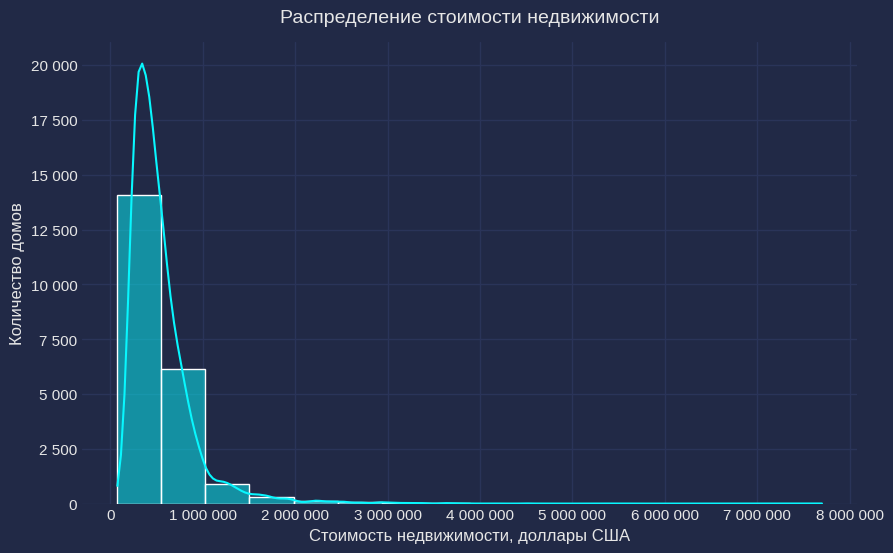

In [ ]:
# Построение гистограммы для распределения стоимости недвижимости:

plt.style.use('cyberpunk')

plt.figure(figsize=(10, 6))

sns.histplot(data=df_houses,
             x='price',
             kde=True,
             bins=16)


# Устанавливаем формат для оси X, чтобы избежать применения
# экспоненциального формата для отображения:
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))

# Устанавливаем формат для оси Y для более удобного восприятия чисел:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))


plt.title('Распределение стоимости недвижимости',
          fontsize=14,
          pad=14)

plt.xlabel('Стоимость недвижимости, доллары США')
plt.ylabel('Количество домов')

plt.show()

Распределение стоимости недвижимости в долларах США характеризуется значительной правосторонней (положительной) ассиметрией.

Так, среднее значение составляет 540 088 долларов.

Интересно, что по предыдущим расчетам было выявлено, что распределение является бимодальным с модами в точках 350 000 и 450 000.

Подобную правостороннюю скошенность распределения и сдвиг среднего в большую сторону относительно медианы (450 000) вызывает наличие объектов недвижимости с очень высокой стоимостью (максимальная - 7 700 000 долларов), однако 90% домов стоят не более, чем 887 000 долларов.

In [ ]:
# 90% перцентиль:
df_houses['price'].quantile(0.9)

887000.0



---



In [ ]:
df_houses.describe()

date       price  bedrooms  bathrooms  \
count                          21613   21613.000 21613.000  21613.000   
mean   2014-10-29 04:38:01.959931648  540088.142     3.371      2.115   
min              2014-05-02 00:00:00   75000.000     0.000      0.000   
25%              2014-07-22 00:00:00  321950.000     3.000      1.750   
50%              2014-10-16 00:00:00  450000.000     3.000      2.250   
75%              2015-02-17 00:00:00  645000.000     4.000      2.500   
max              2015-05-27 00:00:00 7700000.000    33.000      8.000   
std                              NaN  367127.196     0.930      0.770   

       sqft_living    sqft_lot    floors  waterfront      view  condition  \
count    21613.000   21613.000 21613.000   21613.000 21613.000  21613.000   
mean      2079.900   15106.968     1.494       0.008     0.234      3.409   
min        290.000     520.000     1.000       0.000     0.000      1.000   
25%       1427.000    5040.000     1.000       0.000     0.000      3.000   
50%       1910.000    7618.000     1.500       0.000     0.000      3.000   
75%       2550.000   10688.000     2.000       0.000     0.000      4.000   
max      13540.000 1651359.000     3.500       1.000     4.000      5.000   
std        918.441   41420.512     0.540       0.087     0.766      0.651   

          grade  sqft_above  sqft_basement  yr_built  yr_renovated       lat  \
count 21613.000   21613.000      21613.000 21613.000     21613.000 21613.000   
mean      7.657    1788.391        291.509  1971.005        84.402    47.560   
min       1.000     290.000          0.000  1900.000         0.000    47.156   
25%       7.000    1190.000          0.000  1951.000         0.000    47.471   
50%       7.000    1560.000          0.000  1975.000         0.000    47.572   
75%       8.000    2210.000        560.000  1997.000         0.000    47.678   
max      13.000    9410.000       4820.000  2015.000      2015.000    47.778   
std       1.175     828.091        442.575    29.373       401.679     0.139   

           long  sqft_living15  sqft_lot15  
count 21613.000      21613.000   21613.000  
mean   -122.214       1986.552   12768.456  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.230       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000  
std       0.141        685.391   27304.180

In [ ]:
# Отдельно произведем расчет моды по количественным переменным:

df_houses[num_vars].mode()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 350000.000     3.000      2.500     1300.000  5000.000   1.000       0.000   
1 450000.000       NaN        NaN          NaN       NaN     NaN         NaN   
2        NaN       NaN        NaN          NaN       NaN     NaN         NaN   
3        NaN       NaN        NaN          NaN       NaN     NaN         NaN   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0 0.000      3.000  7.000    1300.000          0.000  2014.000         0.000   
1   NaN        NaN    NaN         NaN            NaN       NaN           NaN   
2   NaN        NaN    NaN         NaN            NaN       NaN           NaN   
3   NaN        NaN    NaN         NaN            NaN       NaN           NaN   

     lat     long  sqft_living15  sqft_lot15  
0 47.532 -122.290       1540.000    5000.000  
1 47.549      NaN            NaN         NaN  
2 47.662      NaN            NaN         NaN  
3 47.685      NaN            NaN         NaN

### **Изучите распределение квадратуры жилой площади**

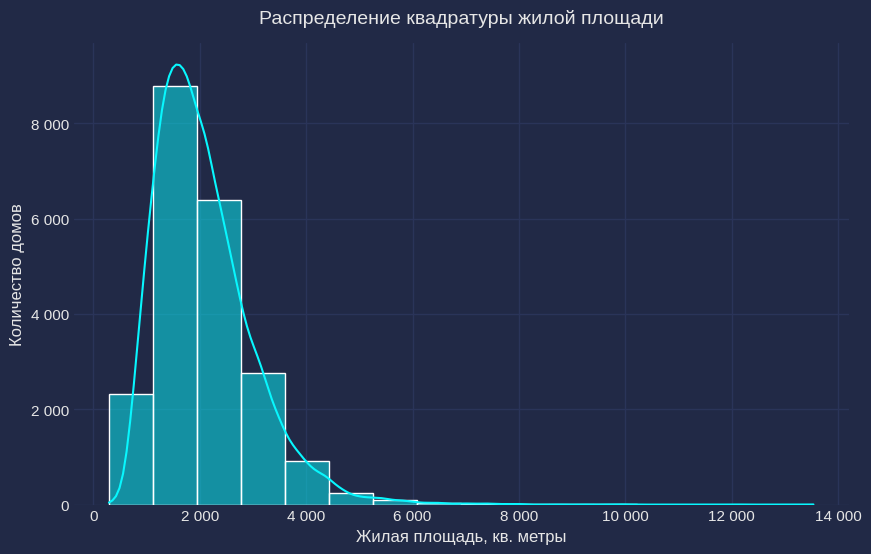

In [ ]:
# Построение гистограммы для распределения квадратуры жилой площади:

plt.style.use('cyberpunk')

plt.figure(figsize=(10, 6))

sns.histplot(data=df_houses,
             x='sqft_living',
             kde=True,
             bins=16)


# Устанавливаем формат для оси X, чтобы избежать применения
# экспоненциального формата для отображения:
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))

# Устанавливаем формат для оси Y для более удобного восприятия чисел:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))


plt.title('Распределение квадратуры жилой площади',
          fontsize=14,
          pad=14)

plt.xlabel('Жилая площадь, кв. метры')
plt.ylabel('Количество домов')

plt.show()

Распределение квадратуры жилой площади в квадратных метрах характеризуется заметной правосторонней (положительной) ассиметрией.

Так, среднее значение составляет 2080 кв. метров. Модальное значение - 1 300.

Подобную правостороннюю скошенность распределения и сдвиг среднего в большую сторону относительно медианы (1 910) вызывает наличие объектов недвижимости с очень высокой квадратурой жилой площади (максимальная - 13 540 кв. метров), однако 90% домов обладают жилой площадью, не более чем 3 250 кв. метров.

In [ ]:
# 90% перцентиль:
df_houses['sqft_living'].quantile(0.9)

3250.0



---



### **Изучите распределение года постройки**

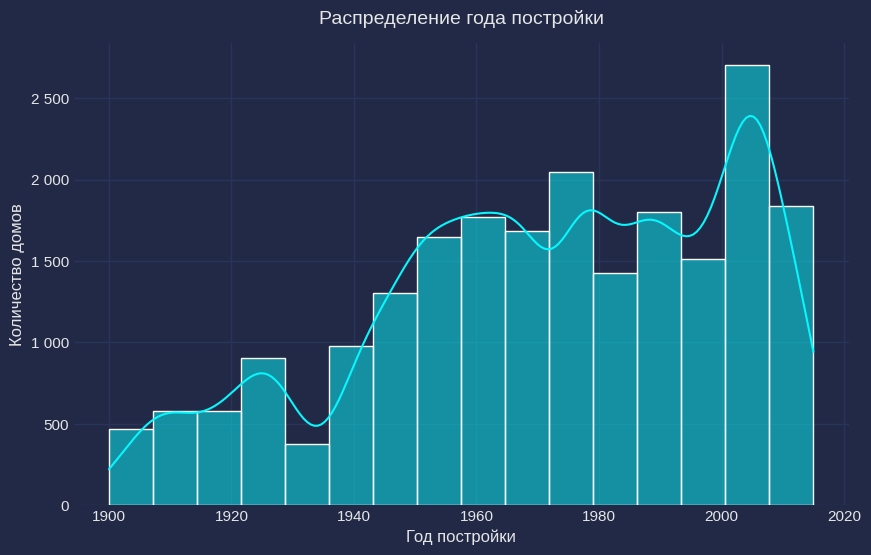

In [ ]:
# Построение гистограммы для распределения года постройки:

plt.style.use('cyberpunk')

plt.figure(figsize=(10, 6))

sns.histplot(data=df_houses,
             x='yr_built',
             kde=True,
             bins=16)


# Устанавливаем формат для оси Y для более удобного восприятия чисел:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))


plt.title('Распределение года постройки',
          fontsize=14,
          pad=14)

plt.xlabel('Год постройки')
plt.ylabel('Количество домов')

plt.show()

Видим, что распределение домов по годам постройки варьируется от 1900 до 2015 года.

Распределение изменяется неравномерно, однако выделяется пиковое значение - 2014 год (мода для данного распределения).

Средний год постройки при этом - 1971, а медианный - 1975 год.

75% домов построены не позже 1997 года. При этом 90% домов построены не позже 2007 года.

In [ ]:
# 90% перцентиль:
df_houses['yr_built'].quantile(0.9)

2007.0



---





---



## **Задание 2**

### **Изучите распределение домов по наличию вида на набережную**

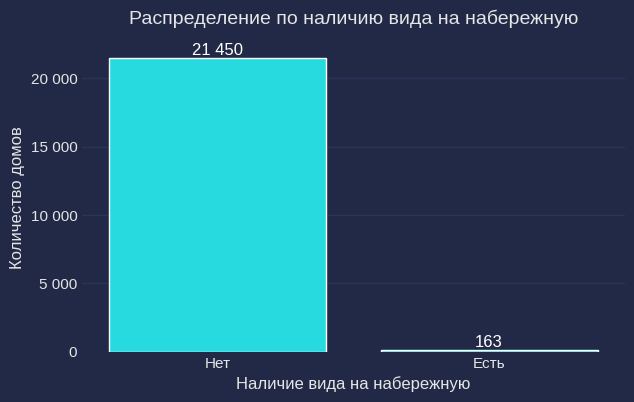

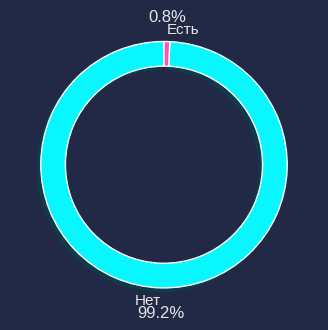

In [ ]:
# Построение гистограммы для распределения по наличию вида на набережную:

plt.style.use('cyberpunk')

plt.figure(figsize=(7, 4))

# Строим диаграмму с указанием порядка отображения и меток:
ax = sns.countplot(x='waterfront', data=df_houses)

# Задаем метки на оси Х в более удобной для восприятия форме:
ax.set_xticks([0, 1])
ax.set_xticklabels(['Нет', 'Есть'])


# Добавляем метки данных:
for p in ax.patches:
    height = p.get_height()
    height_str = f'{height:,.0f}'  # Сначала форматируем с запятой как разделителем
    height_str = height_str.replace(',', ' ')  # Заменяем запятые на пробелы
    ax.annotate(height_str,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='white')


# Устанавливаем формат для оси Y для более удобного восприятия чисел:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))


plt.title('Распределение по наличию вида на набережную',
          fontsize=14,
          pad=14)

plt.xlabel('Наличие вида на набережную')
plt.ylabel('Количество домов')


# ------------------------------
# Построение круговой диаграммы:

plt.figure(figsize=(7, 4))

# Подсчет количества домов с видом на набережную и без:
counts = df_houses['waterfront'].value_counts()

# Создание круговой диаграммы:
plt.pie(counts, labels=['Нет', 'Есть'], autopct='%1.1f%%', pctdistance=1.2,
        shadow=True, startangle=90, wedgeprops={'width': 0.2, 'edgecolor': 'white'})

plt.show()

Как видим, наличие вида на набережную представляет собой крайне редко встречающееся свойство для анализируемых домов.

Только 0,8% объектов характеризуются наличием вида на набережную (лишь 163 дома из 21 613).



---



### **Изучите распределение этажей домов**

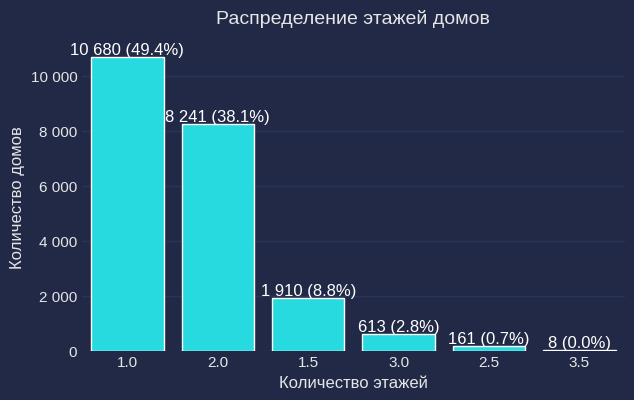

In [ ]:
# Построение гистограммы для распределения этажей домов:

plt.style.use('cyberpunk')

plt.figure(figsize=(7, 4))

# Сортируем данные по количеству этажей по убыванию и сбрасываем индекс:
df_houses_viz = df_houses.sort_values('floors', ascending=False).\
reset_index(drop=True)

# Строим диаграмму с указанием порядка отображения и меток:
ax = sns.countplot(x='floors', data=df_houses_viz,
                   order=df_houses_viz['floors'].value_counts().index)

# Рассчитываем общее количество домов:
total = len(df_houses_viz)

# Добавляем метки данных с процентами:
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    height_str = f'{height:,.0f} ({percentage})'
    height_str = height_str.replace(',', ' ')
    ax.annotate(height_str,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='white')

# Устанавливаем формат для оси Y для более удобного восприятия чисел:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))


plt.title('Распределение этажей домов',
          fontsize=14,
          pad=14)

plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')

plt.show()

Количество этажей в анализируемых домах варьируется от 1 до 3.5. Можно выдвинуть предположение, что дробное число этажей может быть связано, например, с наличием мансарды.

Более всего одноэтажных домов - их около половины от общего количества домов (49.4%). Двухэтажных домов - 38.1%. Таким образом, подавляющее большинство домов (87.5%) - одно- и двухэтажные. Т.е. исследуемые дома представляют собой частный сектор с малоэтажной застройкой.

Наличие трехэтажных домов незначительно - всего 2.8%.

Таким образом, среднее количество этажей почти равно медианному и составляет 1.5.



---



### **Изучите распределение состояния домов**


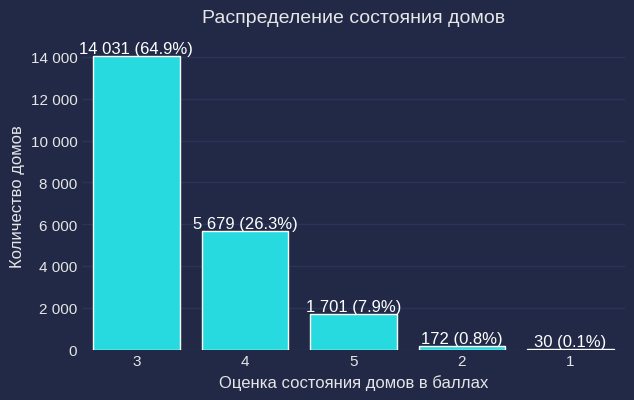

In [ ]:
# Построение гистограммы для распределения состояния домов:

plt.style.use('cyberpunk')

plt.figure(figsize=(7, 4))

# Сортируем данные по количеству этажей по убыванию и сбрасываем индекс:
df_houses_viz_2 = df_houses.sort_values('condition', ascending=False).\
reset_index(drop=True)

# Строим диаграмму с указанием порядка отображения и меток:
ax = sns.countplot(x='condition', data=df_houses_viz_2,
                   order=df_houses_viz_2['condition'].value_counts().index)

# Рассчитываем общее количество домов:
total = len(df_houses_viz_2)

# Добавляем метки данных с процентами:
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    height_str = f'{height:,.0f} ({percentage})'
    height_str = height_str.replace(',', ' ')
    ax.annotate(height_str,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='white')

# Устанавливаем формат для оси Y для более удобного восприятия чисел:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_space))


plt.title('Распределение состояния домов',
          fontsize=14,
          pad=14)

plt.xlabel('Оценка состояния домов в баллах')
plt.ylabel('Количество домов')

plt.show()

Оценка состояния домов в баллах варьируется от 1 до 5.

Более всего домов с оценкой 3 - их более половины от общего количества домов (64.9%). Таким образом, значительная часть домов - среднего качества.

Домов с оценкой 4, т.е. выше среднего - 26.3%.

Домов с самой высокой оценкой качества в 5 баллов немного - только 7.9%.

Наиболее низким качеством в 1 и 2 балла характеризуются лишь около 1% домов.

Таким образом, средняя оценка качества домов - 3.4, при медиане равной 3.



---





---



## **Задание 3**

### **Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости.**

**Визуализация взаимосвязи между переменными**

Построим *диаграммы рассеяния (scatterplots)* попарно между наиболее интересной нам переменной - стоимостью недвижимости, и всеми иными количественными переменными, чтобы визуально оценить силу и направление взаимосвязи между переменными.

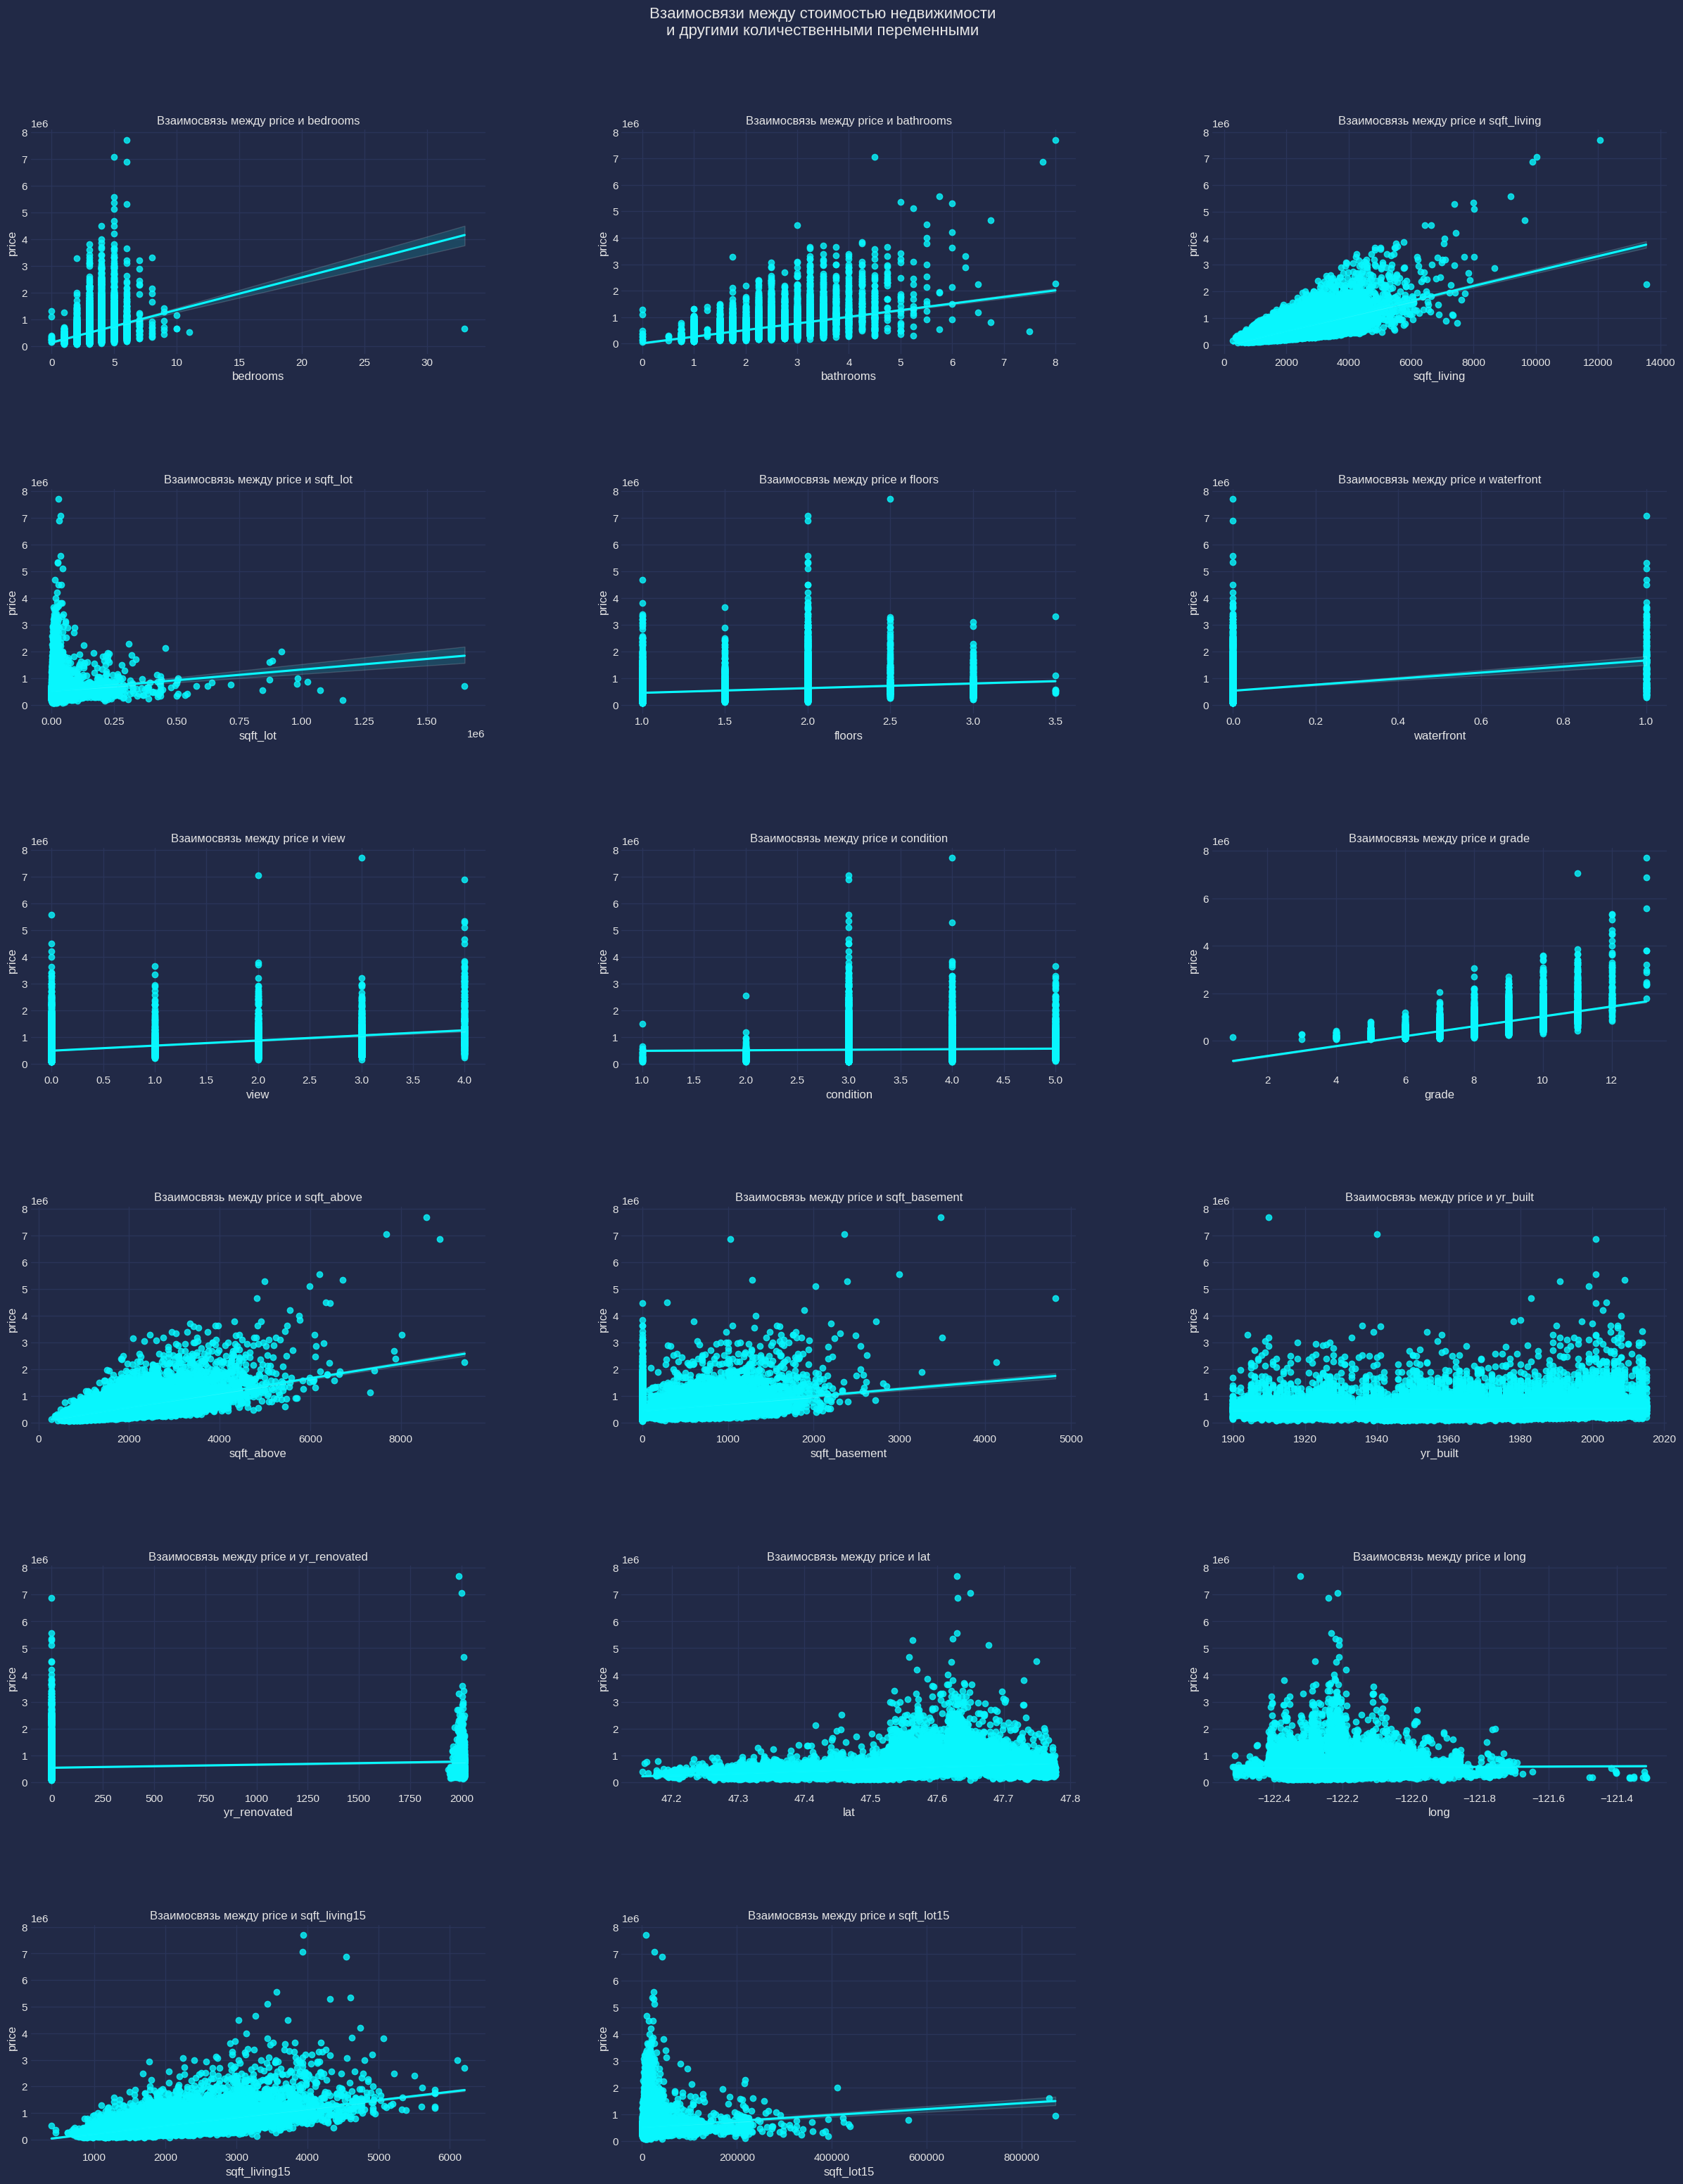

In [225]:
plt.style.use('cyberpunk')

# Создание списка числовых переменных
# за исключением переменной 'price':

num_vars_2 = num_vars.copy()
num_vars_2.remove('price')

# Динамическое определение количества строк и столбцов:
rows = (len(num_vars_2) - 1) // 3 + 1
columns = min(len(num_vars_2), 3)

# Создание сетки поддиаграмм:
gs = gridspec.GridSpec(rows, columns, wspace=0.3, hspace=0.6)

# Создание фигуры:
fig = plt.figure(figsize=(30, 35))

# Создание списка осей:
axes = []
for i in range(rows * columns):
    ax = fig.add_subplot(gs[i])
    axes.append(ax)

main_var = 'price'

# Итерирование по числовым переменным:

for i, (var, ax) in enumerate(zip(num_vars_2, axes[:len(num_vars_2)])):
    # Создание диаграммы рассеяния
    sns.regplot(data=df_houses, x=var, y=main_var, ax=ax)

    # Названия поддиаграмм
    ax.set_title(f'Взаимосвязь между {main_var} и {var}')
    ax.set_xlabel(var)
    ax.set_ylabel(main_var)

# Сделать пустые поддиаграммы невидимыми:
for ax in axes[len(num_vars_2):]:
        ax.axis('off')

fig.suptitle('Взаимосвязи между стоимостью недвижимости\n\
и другими количественными переменными', fontsize=16)

# Регулировка расстояния между поддиаграммами и краями фигуры:
plt.subplots_adjust(top=0.93)  # верхний отступ

plt.show()

**ВЫВОДЫ ПО ВЗАИМОСВЯЗЯМ (между стоимостью недвижимости и другими количественными переменными):**

<br>

Есть выраженная заметная прямая линейная взаимосвязь между стоимостью недвижимости и жилой площадью, что ожидаемо и объяснимо.
Причем взаимосвязь с общей площадью носит явно менее выраженный характер и не столь однозначна.
Причем то же характерно и для показателей площади 15 соседей: выражена прямая линейная связь с жилой площадью соседей. Но в случае в общей площадью соседей связь явно менее выраженная.

Видим выраженную линейную взаимосвязь прямого характера с признаками площади над поверхностью земли и под землей.

Видим и заметную линейную прямую взаимосвязь с оценкой дизайна и конструкции домов: причем стоимость возрастает ярко выраженно пропорционально росту этой оценки.

Наличие большого числа спален не является основанием для того, что и стоимость недвижимости будет большой. Так, наиболее дорогие объекты обладают средним числом спален.
Похожая ситуация и с количеством этажей: количество этажей не связано однозначно со стоимостью. Самые дорогие дома - преимущественно двухэтажные.

Парадоксально, но и качество домов не связано явно со стоимостью. Самые дорогие дома удостоились оценок 3 и 4.

Наличие вида на набережную тоже выраженно не связано со стоимостью. Есть дорогие объекты и с видом на набережную, и без него.

Линейная взаимосвязь с числом ванн уже более выраженная и носит прямой характер: у объектов с очень большим числом ванн и стоимость очень высокая.

Есть некоторая связь с оценкой вида - дома с наиболее высокой оценкой вида обладают и очень высокой стоимостью.

Интересно, что выделяется заметная масса объектов с высокой стоимостью, которые построены после 1980-х годов. Однако есть пара объектов очень дорогих домов с ранними годами постройки (один - 1910-х годов, второй - 1940-х годов). Вероятно, они обладают исторической ценностью.

Также интересно и то, что наличие ремонта не связано явно со стоимостью дома. Есть дома с высокой стоимостью и без ремонта.

Стоит внимания и тот факт, что есть явная взаимосвязь географического положения и стоимости. Можно предположить, что это может быть связано с пространственной близостью к привлекательным локациям (например, побережье, исторический центр и т.д.)






---



**Анализ взаимосязей переменных со стоимостью домов - корреляции**

Чтобы продолжить углубляться в анализ взаимосвязей между переменными, рассмотрим далее показатели **коэффициентов корреляции** между переменными, чтобы выявить *количественные оценки* силы и направления взаимосвязи между переменными.

**Матрица корреляций**

***Коэффициент Пирсона (standard correlation coefficient)***

(это статистическая мера, которая показывает, насколько сильно две переменные *линейно связаны* друг с другом).

<br>

(Позволяет оценить, насколько тесно связаны две переменные. Чем ближек 1 или -1, тем сильнее связь.

По знаку можно определить, является ли связь положительной или отрицательной.

Используется для проверки гипотезы о наличии линейной зависимости между двумя переменными.

Помогает отбирать наиболее важные переменные для построения моделей. Например, в регрессионном анализе).

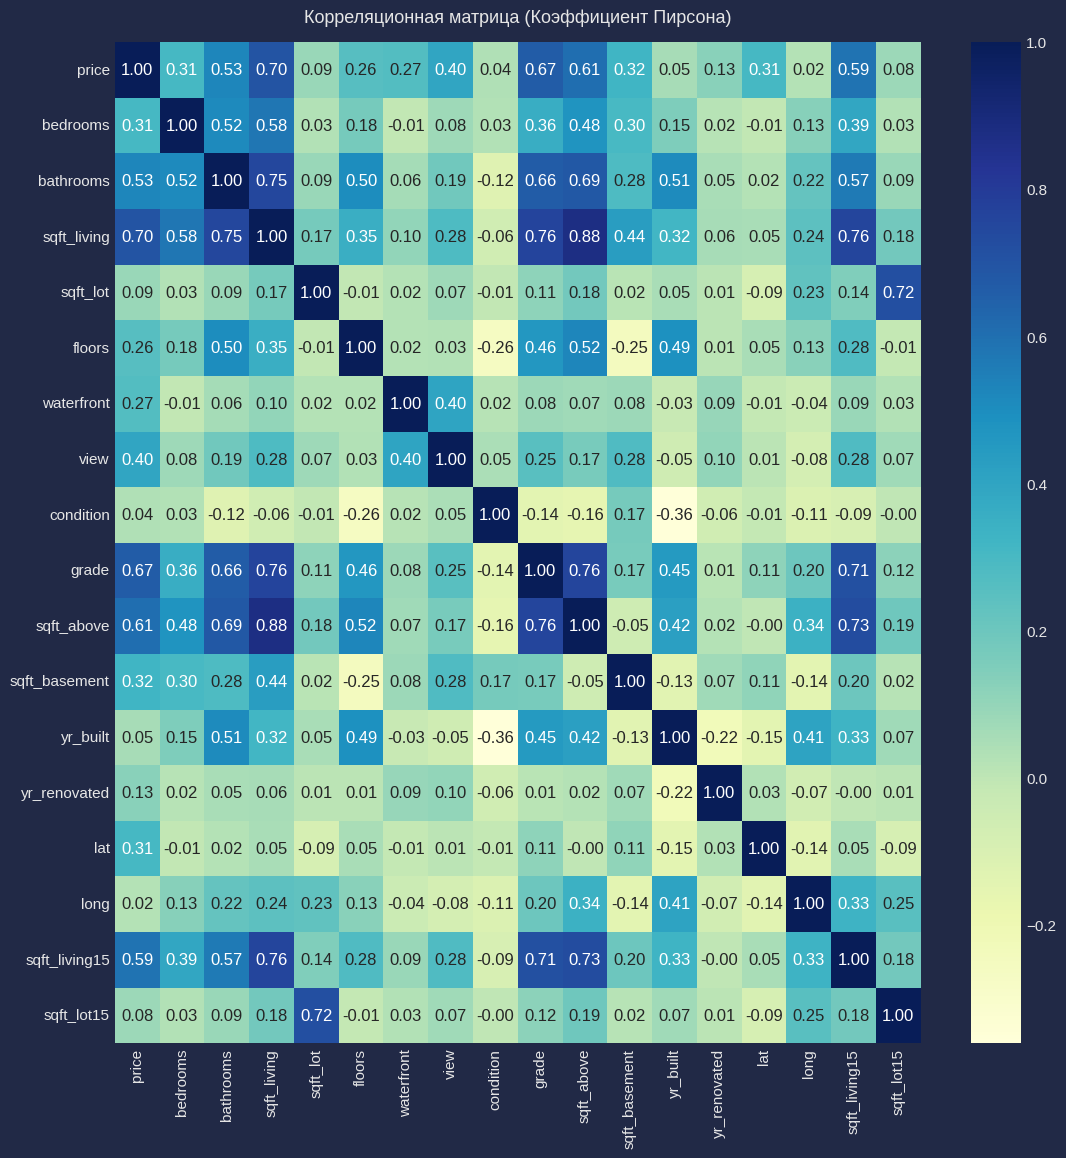

In [ ]:
plt.figure(figsize=(13, 13))

heatmap = sns.heatmap(df_houses[num_vars].corr(method='pearson'),
                      cmap='YlGnBu',
                      annot=True,
                      fmt='.2f')

heatmap.set_title('Корреляционная матрица (Коэффициент Пирсона)',
                  fontdict={'fontsize':13}, pad=14)

plt.show()



---





---



***Коэффициент Кендалла (Kendall Tau correlation coefficient)***

(показатель статистической зависимости между двумя переменными, но в отличие от коэффициента Пирсона, он менее чувствителен к выбросам и не требует предположения о нормальном распределении данных. Измеряет степень согласованности рангов двух переменных).

<br>

(Позволяет оценить не только линейную, но и любую монотонную зависимость между переменными. Это означает, что он может обнаружить не только прямую или обратную пропорциональность, но и более сложные отношения, например, когда с увеличением одной переменной другая сначала увеличивается, а затем уменьшается.

Особенно полезен при работе с ранговыми данными, когда точные значения переменных неизвестны, а известен только их относительный порядок.

Устойчивость к выбросам: Поскольку основан на рангах, а не на точных значениях, он менее чувствителен к выбросам, чем коэффициент Пирсона.

Является непараметрическим коэффициентом, то есть не требует предположений о распределении данных).

<br>

(Как интерпретировать:

|тау| = 1: Полная монотонная зависимость (все пары наблюдений согласованы).

тау = 0: Отсутствие монотонной зависимости.

Знак :

больше 0: Положительная монотонная зависимость (когда одна переменная увеличивается, другая также имеет тенденцию увеличиваться).

меньше 0: Отрицательная монотонная зависимость (когда одна переменная увеличивается, другая имеет тенденцию уменьшаться)).

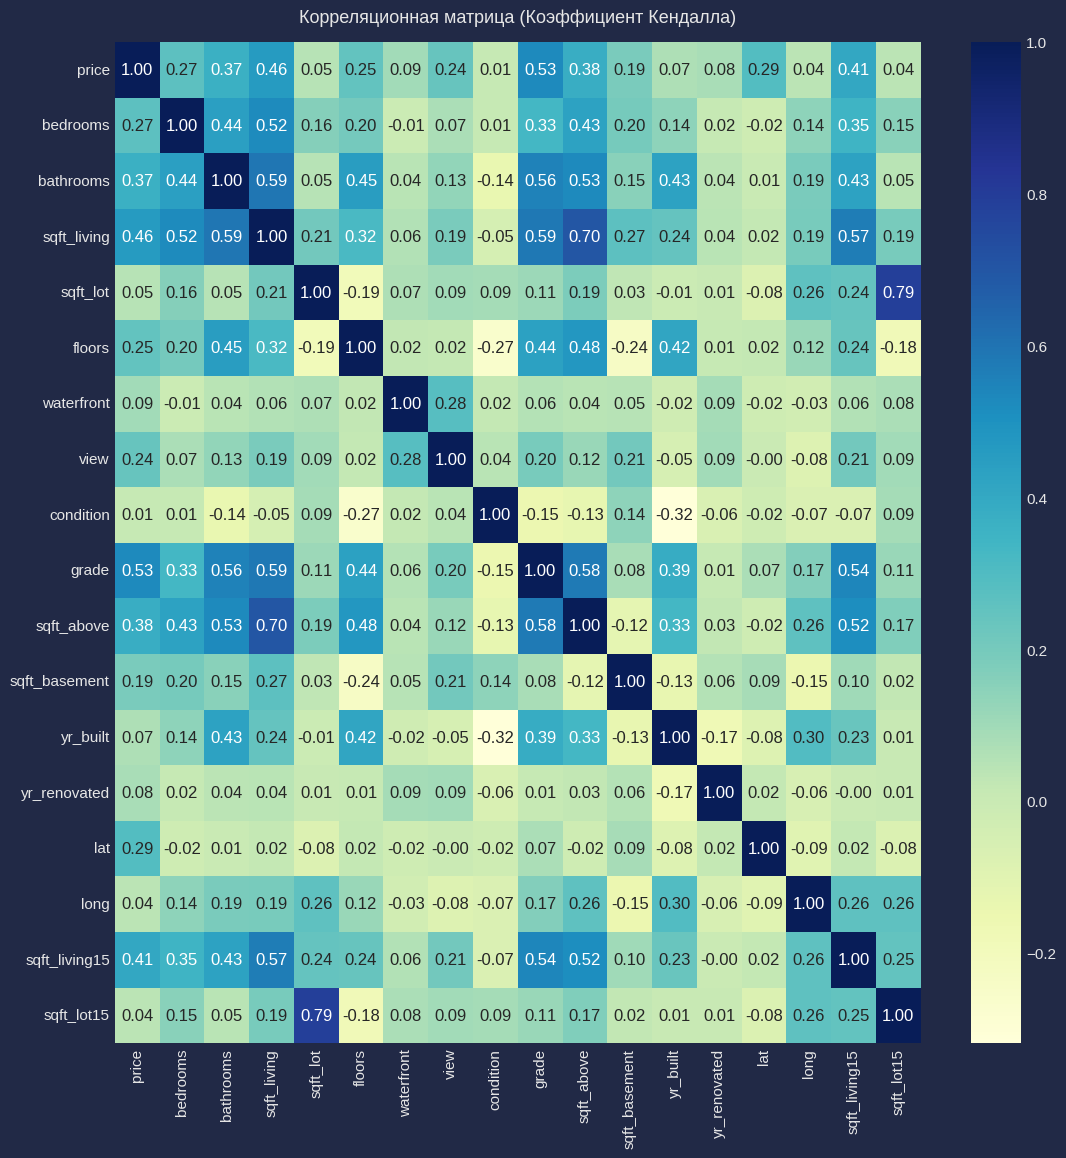

In [ ]:
plt.figure(figsize=(13, 13))

heatmap = sns.heatmap(df_houses[num_vars].corr(method='kendall'),
                      cmap='YlGnBu',
                      annot=True,
                      fmt='.2f')

heatmap.set_title('Корреляционная матрица (Коэффициент Кендалла)',
                  fontdict = {'fontsize':13}, pad=14)

plt.show()



---



***Коэффициент Спирмена (Spearman rank correlation)***

(Подобно коэффициенту Кендалла, является непараметрической мерой статистической зависимости между двумя переменными. Измеряет степень согласованности рангов этих переменных, т.е. оценивает, насколько хорошо ранги одной переменной соответствуют рангам другой).

<br>

(Как и коэффициент Кендалла, позволяет оценить не только линейную, но и любую монотонную зависимость между переменными.

Особенно полезен при работе с ранговыми данными, когда точные значения переменных неизвестны.

Поскольку основан на рангах, менее чувствителен к выбросам, чем коэффициент Пирсона.

Является непараметрическим коэффициентом, что означает, что он не требует предположений о распределении данных).

<br>


(Как интерпретировать:

|ρ| = 1: Полная монотонная зависимость (все пары наблюдений согласованы).

ρ = 0: Отсутствие монотонной зависимости.

Знак:

больше 0: Положительная монотонная зависимость (когда одна переменная увеличивается, другая также имеет тенденцию увеличиваться).

меньше 0: Отрицательная монотонная зависимость (когда одна переменная увеличивается, другая имеет тенденцию уменьшаться)).

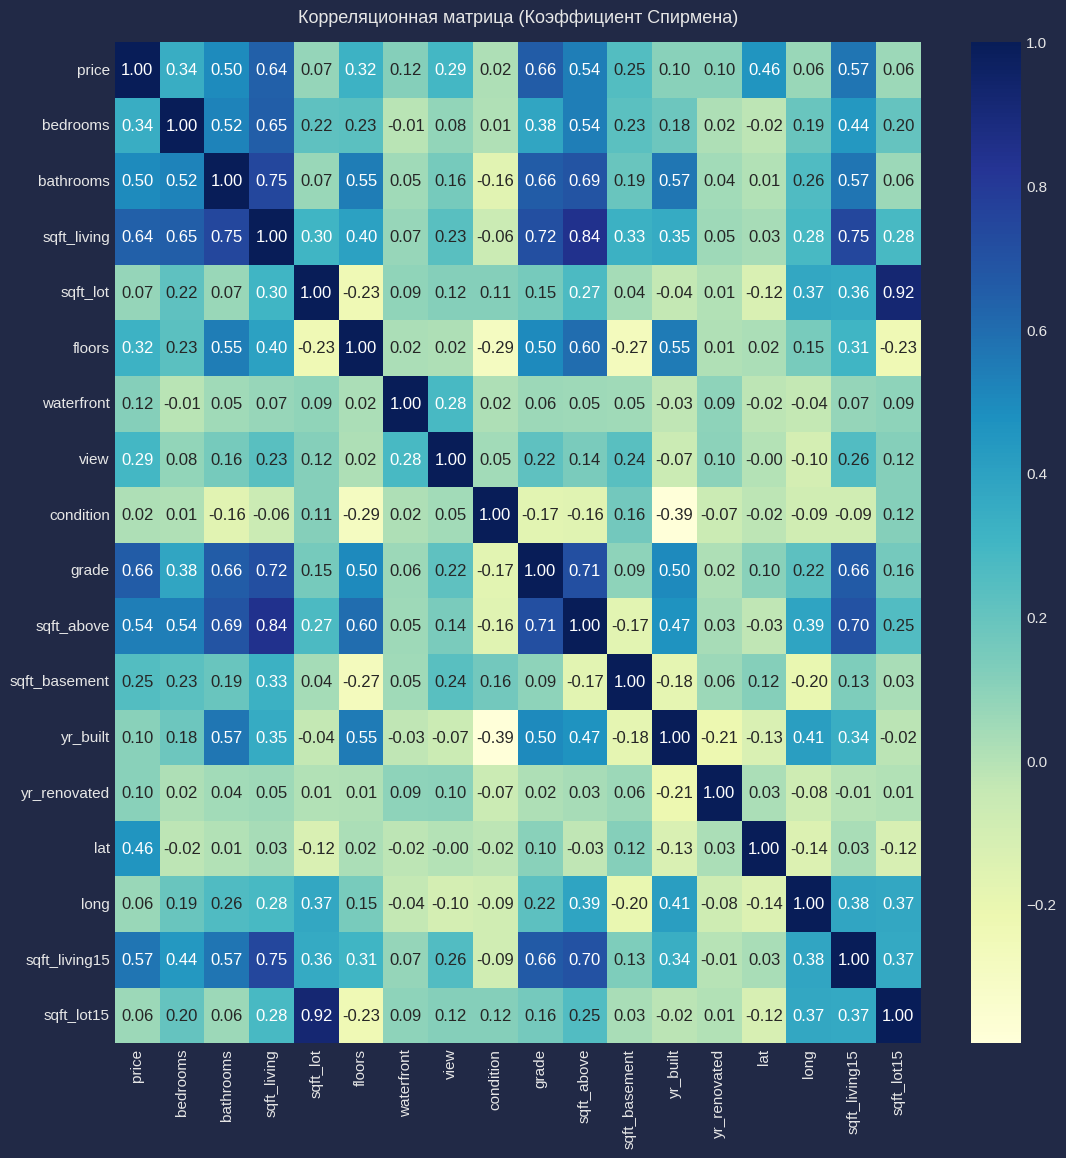

In [ ]:
plt.figure(figsize=(13, 13))

heatmap = sns.heatmap(df_houses[num_vars].corr(method='spearman'),
                      cmap='YlGnBu',
                      annot=True,
                      fmt='.2f')

heatmap.set_title('Корреляционная матрица (Коэффициент Спирмена)',
                  fontdict = {'fontsize':13}, pad=14)

plt.show()



---



**ВЫВОДЫ по корреляциям:**

<br>

При интерпретации силы связи между переменными будет основываться на ***шкале Чеддока:***

(https://koi.tspu.ru/koi_books/fedotov5/rasdel8.htm)

<br>

слабая — от 0,1 до 0,3;

умеренная — от 0,3 до 0,5;

заметная — от 0,5 до 0,7;

высокая — от 0,7 до 0,9;

весьма высокая (сильная) — от 0,9 до 1,0.

---
<br>

Как и отмечалось ранее, наиболее выраженная прямая линейная взаимосвязь (по коэффициенту Пирсона) у показателя стоимости домов наблюдается с жилой площадью (заметная сила связи).

Также заметная по силе линейная прямая связь с оценкой дизайна и конструкции домов, площадью над поверхностью земли, жилой площадью 15 соседей, количеством ванн.

Умеренная по силе линейная прямая связь с оценкой вида, площадью под землей, количеством спален, широтой.

---

Оценки по коэффициенту Спирмена оказались в целом схожи с оценками по коэффициенту Пирсона, но немного ниже. Заметная связь с оценкой дизайна и конструкции, жилой площадью, площадью над поверхностью земли, жилой площадью 15 соседей, количеством ванн.

Самые консервативные оценки - по коэффициенту Кендалла (оказались заметно ниже, чем по коэффициенту Пирсона). Заметная связь только с оценкой дизайна и конструкции.



---





---



**Анализ геопространственных данных**

(распределение объектов и соотвествующих им стоимостей )

In [ ]:
# Создадим функцию, которая будет определять координаты центра исследуемого района
# (как середину географических координат) -
# чтобы в дальнейшем иметь возможность задать центр карты для отображения:

def centre_coord(city_df):
    '''
    Функция принимает на вход датафрейм
    '''

    return [(city_df['lat'].max() + city_df['lat'].min()) / 2, \
            (city_df['long'].max() + city_df['long'].min()) / 2]

In [ ]:
# Создадим функцию, которая будет формировать список списков,
# содержащих широту, долготу и стоимость по каждому объекту:
# (такой список будет нужен в дальнейшем для создания визуализаций):

def lat_lng_sum_list_city(city_df):
    '''
    Функция принимает на вход датафрейм
    '''

    lat_lng_sum_list_city = []
    for row in city_df[['lat', 'long', 'price']].iterrows():
        lat_lng_sum_list_city.append([row[1][0], row[1][1], row[1][2]])

    return lat_lng_sum_list_city



---



**ScatterPlot**

(диаграмма рассеяния - размер и цвет маркеров зависят от стоимости по объектам)

In [ ]:
# Координаты центра района (географического):

main_centre_coord = centre_coord(df_houses)

main_centre_coord

[47.466750000000005, -121.917]

In [ ]:
# Строится диаграмма рассеяния, на которой размер и цвет маркеров
# зависят от стоимости по объектам:

def to_size(value):
    return value/100000

def to_round(value):
    return round(value, 2)

fig = go.Figure(go.Scattermapbox(lat=df_houses['lat'],
                                 lon=df_houses['long'],
                                 text=df_houses['price'].map(to_round),
                                 marker=dict(colorbar = dict(title='Стоимость'),
                                 size=df_houses['price'].map(to_size),
                                 color=df_houses['price'])))

map_center = go.layout.mapbox.Center(lat=main_centre_coord[0],
                                     lon=main_centre_coord[1])

fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=9))

fig.show()

# ! Плюс всплывающая ПОДСКАЗКА с координатами объекта и стоимостью

Просмотреть геопространственную визуализацию с возможностью интерактивного взаимодействия можно по ссылке [Colab Notebook](https://colab.research.google.com/drive/1zoqi838RRIQKYBT1FLhB9oX9K4Oxok8i?usp=sharing)



---



**Тепловая карта**

(отображает градации стоимости по объектам)

In [ ]:
# Создается объект - основная карта района:

main_map = folium.Map(location=main_centre_coord,
                      control_scale=True,
                      zoom_start=10)

In [ ]:
# Список списков, содержащих широту, долготу и стоимость
# по каждому объекту:

lat_lng_sum_list = lat_lng_sum_list_city(df_houses)

lat_lng_sum_list[:5]

[[47.5112, -122.257, 221900.0],
 [47.721, -122.319, 538000.0],
 [47.7379, -122.233, 180000.0],
 [47.5208, -122.393, 604000.0],
 [47.6168, -122.045, 510000.0]]

In [ ]:
# К основной карте района добавляется слой - ТЕПЛОВАЯ КАРТА,
# которая отображает градации стоимости по объектам:

HeatMap(data=lat_lng_sum_list, radius=10, max_zoom=25,
        gradient={0.2: 'blue', 0.5: 'lime', 0.7: 'orange', 1: 'red'},
        min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(main_map)

main_map

Просмотреть геопространственную визуализацию с возможностью интерактивного взаимодействия можно по ссылке [Colab Notebook](https://colab.research.google.com/drive/1zoqi838RRIQKYBT1FLhB9oX9K4Oxok8i?usp=sharing)



---



**ВЫВОДЫ по геопространственным данным**

Таким образом, исследуемые объекты недвижимости располагаются в городе Сиэттл (США) и его окрестностях.

Выдвинутые ранее гипотезы получили подтверждение:

близко к воде располагаются самые дорогие объекты.

Также, как можно видеть, исследуя карту с диаграммой рассеяния и тепловую карту, наиболее дорогие объекты скоцентрированы в центре города. В окрестностях города, в значительном отдалении от центра, ожидаемо дома стоят значительно меньше, чем в центре.



---





---

